# Background
Down syndrome is 21-trisomy syndrome, also known as congenital ignorance. It is a disease caused by an abnormal chromosome (an extra chromosome 21). 60% of the infants have miscarriages in the early stages of the fetus. The survivors have obvious mental retardation, special facial features, growth and development disorders, and multiple deformities. At present, there is no effective medical treatment, and the best way is to terminate the pregnancy before giving birth. Therefore, it is particularly important to screen for the possible diseased genotypes of the fetus.

Protein, as a product encoded by genes, can also play a role in prediction and screening. We found a "Mice Protein Expression Data Set" in 2015 from https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression.

In this data set, experimental mice were divided into 8 classes, and the expression levels of a total of 77 genes were measured. We trained this data set, hoping to use classification to reveal which genes may be related to Down syndrome.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

### Load the data set
In this data set, experimental mice were divided into 8 classes, and the expression levels of a total of 77 genes were measured. We trained this data set, hoping to use classification to reveal which genes may be related to Down syndrome.

Genotype: control (Control) or trisomy (Ts65Dn)

Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

In [2]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls",index_col=0)
df.head(6)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m


However, we noticed that this dataframe has missing values. Use the relevant commands to check as follows:

In [3]:
print(df.isnull().any())

DYRK1A_N      True
ITSN1_N       True
BDNF_N        True
NR1_N         True
NR2A_N        True
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 81, dtype: bool


In order to facilitate further research, we create a new dataframe `df1` where the missing values in each column are filled with the mean values from the non-missing values.

In [4]:
df1 = df.fillna(df.mean())

First, we can get string values from column "Genotype". Then, use the `np.unique` command with the `return_inverse=True` option to numerize the string values into 0/1.

In [5]:
ge_str = df1['Genotype'].values
Tg, y = np.unique(ge_str, return_inverse=True)
print(Tg)
print(y)

['Control' 'Ts65Dn']
[0 0 0 ... 1 1 1]


Except for the last 4 columns, extract the data of all 77 proteins in the dataframe, and then use `preprocessing` in `sklearn` to standardize the data. This can adjust the data to a normal distribution, that is, the mean is 0 and the variance is 1.

In [6]:
names = df1.columns[0:-4]
X = np.array(df1[names])
X_scale = preprocessing.scale(X)

In [7]:
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X_scale,y)

LogisticRegression(C=100000.0, solver='liblinear')

### Plot the weight vector
Use `logreg.coef_` to get the coefficients from the logistic regression model, and reshape this to a 1D array to create a stem plot.

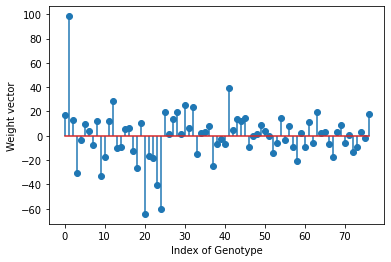

<Figure size 432x288 with 0 Axes>

In [11]:
W = np.array(logreg.coef_)[0,:]
plt.stem(W)
plt.xlabel('Index of Genotype')
plt.ylabel('Weight vector')
plt.show()
plt.savefig('1')

It can be found from the figure above that the different magnitudes of weights may have different relationships with Down syndrome. Find the two genotypes with the largest magnitude.

In [9]:
W_index = np.argsort(np.abs(W))
name1 = names[W_index[-1]]
name2 = names[W_index[-2]]
print('The two most invovled genes are {0:s} and {1:s}'.format(name1,name2))

The two most invovled genes are ITSN1_N and BRAF_N


### Cross Validation
Perform 10-fold cross validation and measure the average precision, recall, and f1-score, and error rate.

The precision is the ratio `tp / (tp + fp)` where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio `tp / (tp + fn)` where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The f1-score can be interpreted as a weighted harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
prec = []
rec = []
f1 = []
acc = []
for train, test in kf.split(X_scale):            
    # Get training and test data
    Xtr = X_scale[train,:]
    ytr = y[train]
    Xts = X_scale[test,:]
    yts = y[test]
    
    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    
    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)
    
# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

print('Precision =  {0:.4f}'.format(precm))
print('Recall =     {0:.4f}'.format(recm))
print('f1 =         {0:.4f}'.format(f1m))
print('Error rate = {0:.4f}'.format(1-accm))

Precision =  0.9482
Recall =     0.9560
f1 =         0.9513
Error rate = 0.0463
